In [61]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [62]:
import pandas as pd

ttc = pd.read_csv("Total Tree Cover.csv")
states = ["Delhi","Gujarat","Tamil Nadu","West Bengal","Kerala","Maharashtra","Haryana"]
years = ['2001','2003','2005','2007','2009','2011','2013','2015','2017','2019']
green = []
for s in states:
    for y in years:
        green.append(ttc[y].loc[ttc['States']==s].item())
print(green)

[151, 268, 283, 292, 296, 290, 294, 299.77, 305.41, 324.44, 19188, 25532, 22336, 22625, 23173, 22783, 23073, 22574.0, 22781.0, 21769.0, 27536, 27634, 28665, 28632, 27958, 27361, 27910, 30850.0, 30952.0, 31194.0, 13957, 14074, 14682, 15357, 15126, 14678, 14557, 18916.0, 18983.0, 18908.0, 16706, 17480, 18227, 20040, 19251, 18332, 18741, 22190.0, 23280.0, 24080.0, 55751, 56185, 56454, 59872, 58223, 55944, 56618, 60186.0, 60513.0, 61584.0, 3280, 2932, 3152, 3081, 2964, 2912, 2869, 2939.0, 3003.0, 3167.0]


In [63]:
ad = pd.read_csv("aircsv.csv")
aqis = []
years = [2001,2003,2005,2007,2009,2011,2013,2015,2017,2019]
for s in states:
    for y in years:
        aqi = ad['AQI'].loc[(ad['state'] == s) & (ad['year'] == y)]
        aqi = list(aqi)
        if len(aqi) == 0:
            aqi = ad['AQI'].loc[(ad['state'] == s) & (ad['year'] == y-1)] 
            aqi1 = ad['AQI'].loc[(ad['state'] == s) & (ad['year'] == y+1)]
            aqi = list(aqi)
            aqi1 = list(aqi1)
            aqi.extend(aqi1)
        aqis.append(sum(aqi)/len(aqi))
print(aqis)

[191.7254384, 192.6765664, 199.6257415, 195.8595969, 197.8148715, 206.5779798, 244.59436290000002, 217.84995940000002, 286.6591847, 278.46921299999997, 95.63283675, 40.97292795, 97.14741836, 93.30187848, 91.05817008, 91.08624785, 80.34809288, 85.48477527, 350.6590909, 270.63376560000006, 83.50569822, 81.94591192499999, 85.86508938, 83.5303332, 79.66335713, 80.06807518, 81.26970442, 79.39007905, 209.3380548, 184.75428080000003, 182.52352150000002, 177.48099865, 165.14740049999997, 170.3377819, 183.4719823, 179.1019605, 179.35247569999999, 153.29035249999998, 241.2882022, 243.14284249999997, 95.41258484, 88.82292513, 97.02330879, 94.02754262, 92.90049813, 87.47843409, 83.66128061, 87.39996973, 165.1018519, 132.71393030000002, 130.4324471, 95.82826700000001, 126.5788152, 124.844327, 122.5161713, 128.4521915, 125.2032777, 127.55311409999999, 201.47433940000002, 208.1854167, 110.83757620000002, 112.7155645, 108.3611154, 95.13157883, 114.08596999999999, 116.50834640000002, 112.2468068, 174.8

In [6]:
ga = pd.read_csv("forest_cover.csv")
g = []
for state in states:
    a = ga["Geographical Area_1-13"].loc[ga['State/UT']==state].item()
    g.append(int(a.replace(',','')))
print(g)

[1483, 196022, 130058, 88752, 38863, 307713, 44212]


In [7]:
r = 10
area = []
ratio = []
for a in g:
    for i in range(r):
        area.append(a)
for i in range(len(green)):
    ratio.append((green[i]/area[i])*100)
print(ratio) 

[10.182063385030343, 18.071476736345247, 19.08293998651382, 19.68981793661497, 19.95954146999326, 19.554956169925827, 19.824679703304113, 20.21375590020229, 20.59406608226568, 21.87727579231288, 9.788697187050433, 13.025068614747322, 11.394639377212762, 11.542071808266419, 11.821632265766087, 11.622675005866688, 11.7706175837406, 11.51605432043342, 11.621654712226178, 11.10538613012825, 21.172092451060294, 21.247443448307678, 22.040166694859217, 22.014793399867752, 21.496563071860248, 21.03753709883283, 21.45965646096357, 23.720186378385026, 23.798612926540468, 23.984683756477878, 15.72584279790878, 15.8576708130521, 16.5427257977285, 17.30327203893997, 17.042996214169822, 16.53821885703984, 16.40188390120786, 21.313322516675683, 21.388813773210742, 21.304308635298362, 42.98690270951805, 44.97851426806989, 46.90065100481177, 51.56575663227234, 49.535547950492756, 47.17083086740602, 48.2232457607493, 57.098010961583, 59.902735249466076, 61.96124848827934, 18.11785657414539, 18.258897089

In [69]:
x = np.array(aqis).reshape((-1,1))
y = np.array(green)
print(x)
print(y)

[[191.7254384 ]
 [192.6765664 ]
 [199.6257415 ]
 [195.8595969 ]
 [197.8148715 ]
 [206.5779798 ]
 [244.5943629 ]
 [217.8499594 ]
 [286.6591847 ]
 [278.469213  ]
 [ 95.63283675]
 [ 40.97292795]
 [ 97.14741836]
 [ 93.30187848]
 [ 91.05817008]
 [ 91.08624785]
 [ 80.34809288]
 [ 85.48477527]
 [350.6590909 ]
 [270.6337656 ]
 [ 83.50569822]
 [ 81.94591192]
 [ 85.86508938]
 [ 83.5303332 ]
 [ 79.66335713]
 [ 80.06807518]
 [ 81.26970442]
 [ 79.39007905]
 [209.3380548 ]
 [184.7542808 ]
 [182.5235215 ]
 [177.48099865]
 [165.1474005 ]
 [170.3377819 ]
 [183.4719823 ]
 [179.1019605 ]
 [179.3524757 ]
 [153.2903525 ]
 [241.2882022 ]
 [243.1428425 ]
 [ 95.41258484]
 [ 88.82292513]
 [ 97.02330879]
 [ 94.02754262]
 [ 92.90049813]
 [ 87.47843409]
 [ 83.66128061]
 [ 87.39996973]
 [165.1018519 ]
 [132.7139303 ]
 [130.4324471 ]
 [ 95.828267  ]
 [126.5788152 ]
 [124.844327  ]
 [122.5161713 ]
 [128.4521915 ]
 [125.2032777 ]
 [127.5531141 ]
 [201.4743394 ]
 [208.1854167 ]
 [110.8375762 ]
 [112.7155645 ]
 [108.36

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[170.3377819 ]
 [128.4521915 ]
 [271.7788671 ]
 [108.3611154 ]
 [ 94.02754262]
 [197.8148715 ]
 [116.5083464 ]
 [130.4324471 ]
 [199.6257415 ]
 [ 95.41258484]
 [ 40.97292795]
 [195.8595969 ]
 [122.5161713 ]
 [ 87.47843409]
 [ 95.63283675]
 [ 88.82292513]
 [132.7139303 ]
 [124.844327  ]
 [127.5531141 ]
 [165.1474005 ]
 [ 91.05817008]
 [174.828495  ]
 [270.6337656 ]
 [184.7542808 ]
 [126.5788152 ]
 [179.1019605 ]
 [350.6590909 ]
 [191.7254384 ]
 [ 91.08624785]
 [206.5779798 ]
 [ 80.34809288]
 [ 83.50569822]
 [112.2468068 ]
 [286.6591847 ]
 [ 93.30187848]
 [ 80.06807518]
 [153.2903525 ]
 [ 85.48477527]
 [110.8375762 ]
 [ 83.66128061]
 [ 95.13157883]
 [243.1428425 ]
 [241.2882022 ]
 [192.6765664 ]
 [201.4743394 ]
 [ 97.14741836]
 [112.7155645 ]
 [ 79.66335713]
 [244.5943629 ]
 [ 83.5303332 ]
 [179.3524757 ]
 [ 81.94591192]
 [278.469213  ]
 [114.08597   ]
 [ 87.39996973]
 [ 92.90049813]]
[[ 81.26970442]
 [ 79.39007905]
 [165.1018519 ]
 [ 85.86508938]
 [182.5235215 ]
 [ 95.828267  ]
 [217.8

In [67]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
r_sq = model.score(x_train,y_train)
print(r_sq)

0.06869645827314662


In [44]:
print(model.intercept_)
print(model.coef_)

29676.172428518832
[-68.19786922]


In [45]:
y_pred = model.predict(x_test)
print(y_pred)

[24133.75175479 24261.93819996 18416.57792436 23820.35629226
 17228.45717935 23140.8888079  14819.26938737 15478.37060652
 17163.77417375 12899.96706295 21137.57566979 15399.76314411
 17572.34649322 23059.38950419]


In [46]:
import pandas as pd
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(df)

      Actual     Predicted
0   27910.00  24133.751755
1   30850.00  24261.938200
2   23280.00  18416.577924
3   28665.00  23820.356292
4   13957.00  17228.457179
5   56185.00  23140.888808
6     299.77  14819.269387
7   61584.00  15478.370607
8   15126.00  17163.774174
9    3167.00  12899.967063
10  56618.00  21137.575670
11  30952.00  15399.763144
12  14074.00  17572.346493
13  18227.00  23059.389504


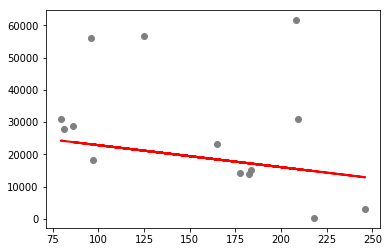

In [47]:
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [49]:
import numpy as np
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

19233.81112710653


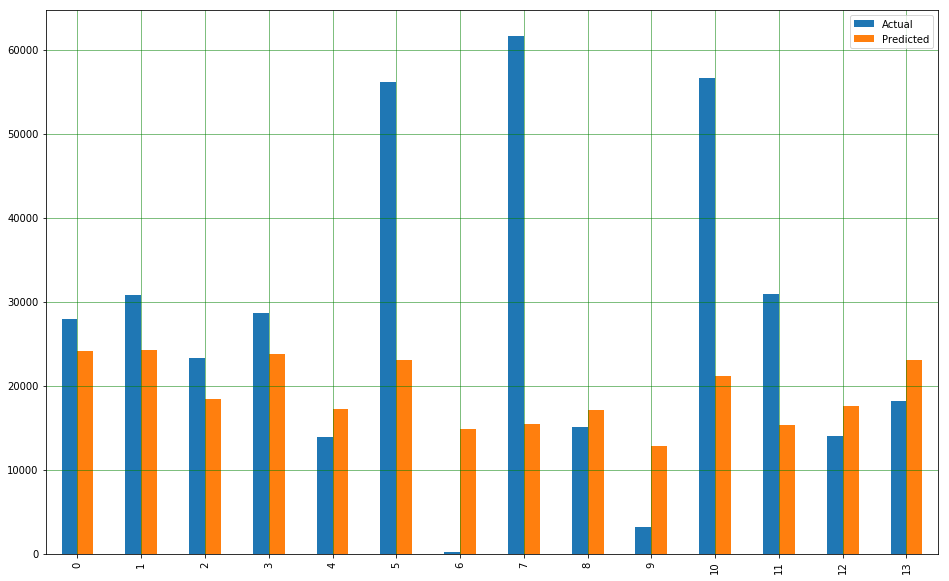

In [50]:
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [70]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd


x = np.array(aqis).reshape((-1,1))
y = np.array(ratio)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

model = LinearRegression()
model.fit(x_train,y_train)
r_sq = model.score(x_train,y_train)
print('Intercept',model.intercept_)
print('Coefficient',model.coef_)
y_pred = model.predict(x_test)

df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(df)

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Intercept 26.18559115676101
Coefficient [-0.03965888]
       Actual  Predicted
0   21.459656  22.962526
1   23.720186  23.037070
2   59.902735  19.637837
3   22.040167  22.780278
4   15.725843  18.946913
5   18.258897  22.385149
6   20.213756  17.545906
7   20.013454  17.929191
8   17.042996  18.909298
9    7.163214  16.429780
10  18.399613  21.220169
11  23.798613  17.883478
12  15.857671  19.146894
13  46.900651  22.337755
13.119912457372319
